# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.207559973 W= 0.45162135 b= -0.6519072
Epoch: 0100 cost= 0.192473695 W= 0.43960574 b= -0.5654673
Epoch: 0150 cost= 0.179129809 W= 0.42830485 b= -0.4841701
Epoch: 0200 cost= 0.167326778 W= 0.41767606 b= -0.407707
Epoch: 0250 cost= 0.156886861 W= 0.4076794 b= -0.3357917
Epoch: 0300 cost= 0.147652671 W= 0.39827722 b= -0.2681534
Epoch: 0350 cost= 0.139485016 W= 0.38943446 b= -0.20453829
Epoch: 0400 cost= 0.132260755 W= 0.38111737 b= -0.14470646
Epoch: 0450 cost= 0.125870958 W= 0.37329507 b= -0.08843316
Epoch: 0500 cost= 0.120219246 W= 0.36593792 b= -0.035506517
Epoch: 0550 cost= 0.115220442 W= 0.35901845 b= 0.014272262
Epoch: 0600 cost= 0.110799134 W= 0.35251036 b= 0.061090462
Epoch: 0650 cost= 0.106888637 W= 0.34638944 b= 0.10512418
Epoch: 0700 cost= 0.103429981 W= 0.34063247 b= 0.14653902
Epoch: 0750 cost= 0.100370973 W= 0.33521795 b= 0.18549062
Epoch: 0800 cost= 0.097665429 W= 0.33012548 b= 0.22212583
Epoch: 0850 cost= 0.095272593 W= 0.32533583 b= 0.25658214
Epoch: 09

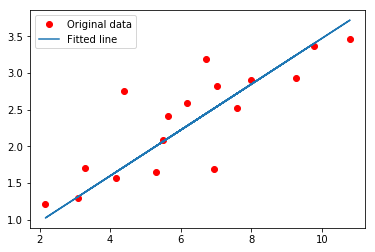

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [9]:
# Regression result